In [1]:
import cv2 #open cv 모듈 #open cv는 numpy의 자료형을 다룸
from google.colab import files #코랩에서 파일불러오기위한 모듈
from google.colab.patches import cv2_imshow #코랩에서 내놓은 cv호환패치 모듈
import numpy as np
from time import time, sleep

Saving flower.jpg to flower (1).jpg
(391, 400, 3)


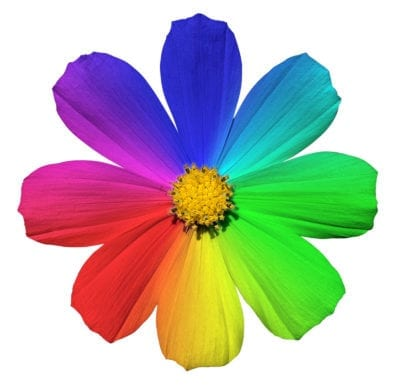

In [2]:
file1 = files.upload()
img1 = cv2.imread("flower.jpg") #"flower.jpg"는 업로드하는 이미지 파일명으로 수정 필요 #절대경로 혹은 상대경로로 가져옴
print(img1.shape) #shape로 정보 출력 (가로,세로,채널) -> 이미지가 가진 정보의 행렬의 크기를 알 수 있음
cv2_imshow(img1) 
#넘파이 np.zeros(shape,dtype,order) opencv에서 쓰는 자료타입만들기 b g r 순서로 색정보가 배열되어있음 

In [66]:
#회색조
def 회색조(이미지,mode='r'):
  height, width, channel = 이미지.shape
  gray_img=np.zeros(shape=(height,width,1), dtype=np.uint8)
  for y in range(height):
    gimg=gray_img[y]
    oimg=이미지[y]
    for x in range(width):
      R=oimg[x][2]; G=oimg[x][1]; B=oimg[x][0]
      if mode=='r':
        gray=(int(R)+int(G)+int(B))/3 #uint8값을 바로 사칙연산하려고하면 에러발생 int()씌운 뒤 해야한다.
      elif mode=='g':
        gray=0.2126*R+0.7152*G+0.0722*B
      elif mode=='b':
        gray=0.299*R+0.857*G+0.114*B
      if gray>255:
        gray=255
      gimg[x]=gray

  cv2_imshow(gray_img)
  return gray_img

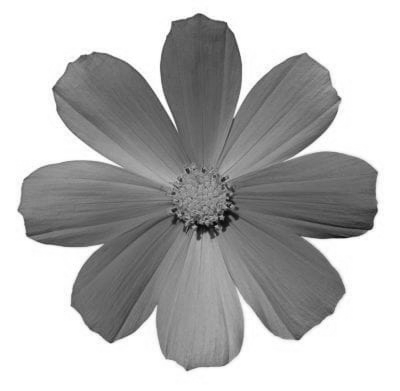

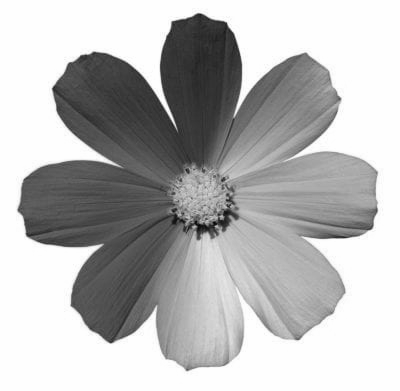

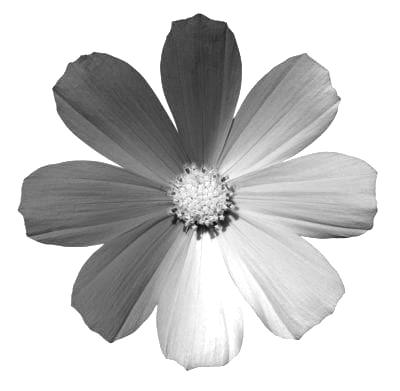

In [67]:
a=회색조(img1,'r')
a=회색조(img1,'g')
a=회색조(img1,'b')

In [60]:
#RGB 분리
def RGB분리(이미지,모드='r'):
  if 모드=='r':
    color=2
  elif 모드=='g':
    color=1
  elif 모드=='b':
    color=0
  height, width, channel = 이미지.shape
  rgb_img=np.zeros(shape=(height,width,1), dtype=np.uint8)
  for y in range(height):
    rgbimg=rgb_img[y]
    oimg=이미지[y]
    for x in range(width):
     rgbimg[x]=oimg[x][color]
     
  cv2_imshow(rgb_img)
  return rgb_img


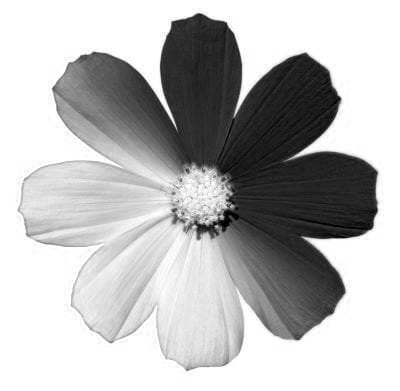

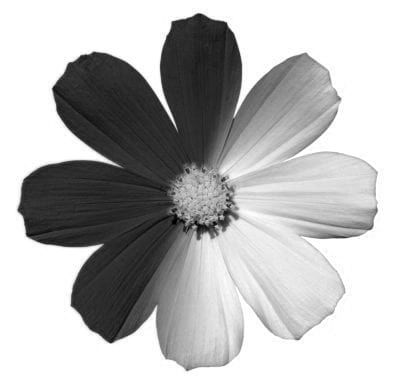

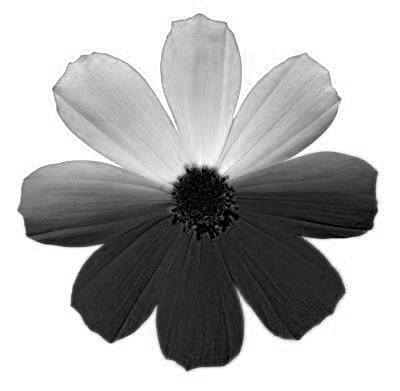

In [61]:
b1=RGB분리(img1,'r')
b2=RGB분리(img1,'g')
b3=RGB분리(img1,'b')
#분리된 채널에서 검은색으로 강하게 보이는부분은 그색이 강한부분, 다른색과 조합되서 다르게 나올수는 있다.

In [62]:
#HSV 변환
def RGB를HSV(이미지):
  height, width, channel = 이미지.shape
  hsv_img=np.zeros(shape=(height,width,3), dtype=np.uint8)
  for y in range(height):
    hsvimg=hsv_img[y]
    oimg=이미지[y]
    for x in range(width):
      B=oimg[x][0]/255 #B
      G=oimg[x][1]/255 #G
      R=oimg[x][2]/255 #R
      lst=[R,G,B]
      lst.sort()
      minRGB=lst[0]
      maxRGB=lst[2]

      V=maxRGB
      if V !=0:
        S=(V-minRGB)/V
      else:
        S=0
      if V==minRGB:
        H=0
      elif V==R:
        H=(60*(G-B))/(V-minRGB)
      elif V==G:
        H=(120+(60*(B-R)))/(V-minRGB)
      elif V==B:
        H=(240+(60*(R-G)))/(V-minRGB)
      if H<0:
        H=H+360

      hsvimg[x][0]=int(H/360*255)
      hsvimg[x][1]=int(S*255)
      hsvimg[x][2]=int(V*255)
  cv2_imshow(hsv_img)
  return hsv_img

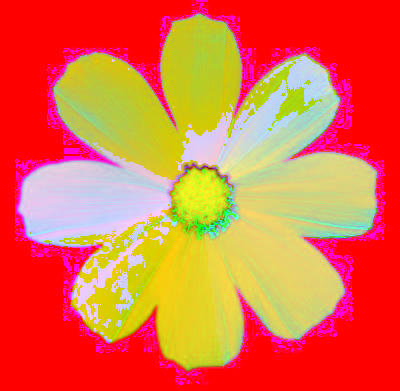

In [63]:
c=RGB를HSV(img1)

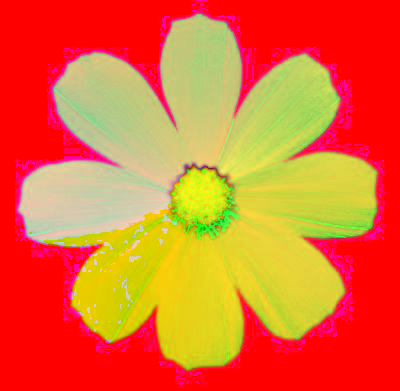

In [11]:
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)